In [15]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# scale back and remmove negative values
# apply gradient dexcent attack on benign sample -> scale back + delta + modify sample by adding bytes
# scale d_max same as for the features

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('PDFMalware2022.csv').dropna()
data = data.sample(1000)

# Features recognized by pdfid
pdfid_columns = ['obj', 'endobj', 'stream', 'endstream', 'xref', 'trailer', 'startxref', 'header',
                 'pages', 'isEncrypted', 'ObjStm', 'JS', 'Javascript', 'AA', 'OpenAction',
                 'Acroform', 'JBIG2Decode', 'RichMedia', 'launch', 'embedded files', 'XFA', 'Colors',
                 'Class']


In [17]:
new_labels = {'Malicious': 1, 'Benign': 0}
data['Class'] = data['Class'].map(new_labels)
print(data['Class'].value_counts())

new_labels = {'1(1)': '1', '2(1)': '2', '3(1)': '3', '29(2)': '29', '34(2)': '34', '2(2)': '2', '>': '0', '53(1)': '53', '5(1)': '5', '12(2)': '2', '53(2)': '53', '-1': '0', 
              '(most': '0', '_Pro_Rodeo_Pix_': '0', "_Pro_Rodeo_Pix_'": '0', 'pdfid.py': '0', 'pdfHeader)': '0', 'bytes[endHeader]': '0', 'list': '0', 'unclear': '0', 'Yes': '1', 'No': '0'}

for col in data.drop(columns=['Class']).columns:
    data[col] = data[col].replace(new_labels)

data.head()

Class
1    2271
0    1729
Name: count, dtype: int64


,Fine name,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
522,fd30f7e633d3373f915c0e6d814219fb979b2e851101da...,11.0,258.0,1.0,31.0,0.0,0.0,0.0,0,0,...,0,1,1,0,0,0,0,0,0.0,1
8256,db40a63cc1b5ea0f43f6235a1b3d4948bbcaf971e543ff...,6.0,353.0,1.0,38.0,16.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,0,0.0,0
2554,91c9b2cb4c5f55e1d0c80b0113cfcde1ad0b15a044eda5...,190.0,277.0,1.0,34.0,0.0,0.0,0.0,2,0,...,0,1,0,0,0,0,0,0,0.0,1
4588,c0dfa4aae6beb0649fe0635537428808f6630819e11e63...,76.0,307.0,1.0,16.0,15.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0.0,1
7362,bdc497d82ba70d8f263a3d65972896244fbf355ebaa9a7...,80.0,353.0,1.0,593.0,27.0,0.0,0.0,0,1,...,0,0,2,0,0,0,8,0,0.0,0


In [18]:
data = data[pdfid_columns]
class_data = data.drop(columns=['header', 'Class'])

x_train, x_test, y_train, y_test = train_test_split(class_data, data['Class'], test_size=0.2, random_state=77)
x_train.iloc[:10]

,obj,endobj,stream,endstream,xref,trailer,startxref,pages,isEncrypted,ObjStm,...,Javascript,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,embedded files,XFA,Colors
7214,66,66,34.0,34,2,2.0,2,4.0,0.0,3.0,...,0,0,0,1,0,0,0,0.0,0,0.0
5142,156,156,52.0,52,1,1.0,1,3.0,0.0,0.0,...,1,0,1,0,0,0,0,0.0,0,0.0
8221,7,7,2.0,2,1,1.0,1,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0.0,0,0.0
7013,34,34,31.0,31,0,0.0,2,1.0,0.0,6.0,...,0,0,0,1,0,0,0,0.0,0,0.0
835,11,11,3.0,3,0,1.0,0,1.0,0.0,0.0,...,4,0,0,0,0,0,0,0.0,0,0.0
8085,84,84,78.0,78,0,0.0,3,2.0,0.0,11.0,...,0,0,0,2,0,0,0,0.0,0,0.0
8460,11,11,3.0,3,2,2.0,2,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0.0,0,0.0
1158,14,14,2.0,2,1,1.0,1,1.0,0.0,0.0,...,3,0,1,1,0,0,0,0.0,0,0.0
4188,19,19,1.0,1,1,1.0,1,1.0,0.0,0.0,...,1,0,1,0,0,0,0,0.0,0,0.0
9435,370,370,46.0,46,2,2.0,2,60.0,0.0,0.0,...,0,0,0,0,0,0,0,0.0,0,0.0


In [19]:

# Normalize features
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# pd.DataFrame(x_train, columns=class_data.columns).head()

In [20]:
def evasion_gradient_descent(x0, gradient, t, epsilon, max_iter, d_max=10):
    """Evasion gradient descent attack
    :param gradient: malicious sample to be modified
    :param gradient: gradient of the chosen discriminant
    :param t: learning rate of the gradient descent
    :param max_iter: max number of iterations
    :param d_max: max number of modifications
    """
    m = 0
    x_m = x0
    for i in range(max_iter):

        m += 1
        x_m = x_m - t * gradient
        # print(f"Iteration {i}...")
        # x_m = np.maximum(x_m, 0)
        x_m = project(x_m, x0, d_max)
        if np.linalg.norm(x_m - x0) < epsilon:
            break

    x = x_m
    return x_m


def project(x, x0, d_max):
    dist = np.linalg.norm(x - x0)
    if dist > d_max:
        return x0 + d_max * (x - x0) / dist
    return x



def penalizer(feature_vector, benign_vectors, l, h):

    distances = np.linalg.norm(benign_vectors - feature_vector, axis=1)
    p = np.sum(np.exp(-distances / h))
    p *= (l / benign_vectors.shape[0])
    
    return p


def penalizer_gradient(feature_vector, benign_vectors, l, h):
    n = benign_vectors.shape[0]
    grad_p = np.zeros(feature_vector.shape)

    diff = feature_vector - benign_vectors
    norms = np.sum(np.pow(diff, 2), axis=1)
    weights = np.exp(- norms / h)

    grad_p = np.sum(weights[:, None] * diff, axis=0)
    grad_p *= -2 / (n * h)
    return grad_p



def evasion_gradient_descent_penalized(x0, gradient, t, epsilon, max_iter, x, l, h=10, d_max=10):
    """Evasion gradient descent attack
    :param gradient: malicious sample to be modified
    :param gradient: gradient of the chosen discriminant
    :param t: learning rate of the gradient descent
    :param max_iter: max number of iterations
    :param x: set of benign samples
    :param l: factor of the penalizer
    :param h: bandwidth parameter for the kernel density estimator
    :param d_max: max number of modifications
    """
    m = 0
    x_m = x0
    prev_F = 10*100
    for i in range(max_iter):

        # print(f"Iteration {i}...")
        m += 1
        grad_F = gradient - penalizer_gradient(x_m, x, l, h)
        x_m = x_m - t * grad_F
        
        x_m = project(x_m, x0, d_max)

        current_F = penalizer(x_m, x, l, h)

        if np.abs(prev_F - current_F) < epsilon:
            break

        prev_F = current_F

    x = x_m
    return x_m

## SVM

In [21]:
C_values = [1, 0.8, 0.5, 0.3, 0.1]
scores = []

for c in C_values:
    svc = SVC(kernel='linear', C=c)
    svc.fit(x_train, y_train)
    y_pred = svc.predict(x_test)
    f1 = f1_score(y_test, y_pred)
    scores.append(f1)
    print(f"C = {c}, F1: {f1}")

best_c = C_values[scores.index(max(scores))]
best_c

C = 1, F1: 0.9683751363140676
C = 0.8, F1: 0.9694989106753813
C = 0.5, F1: 0.9379600420609885
C = 0.3, F1: 0.9487459105779716
C = 0.1, F1: 0.7041499330655957


0.8

In [22]:
svc = SVC(kernel='linear', C=1)
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

svm_accuracy = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
svm_f1 = f1_score(y_test, y_pred)

print(f"""SVM scores
      accuracy score: {svm_accuracy}
      precision score: {svm_precision}
      recall score: {svm_recall}
      f1 score: {svm_f1}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")

SVM scores
      accuracy score: 0.96375
      precision score: 0.9932885906040269
      recall score: 0.9446808510638298
      f1 score: 0.9683751363140676

Confusion matrix:
[[327   3]
 [ 26 444]]


In [23]:
gamma_values = [10, 5, 1, 1/1000, 1/x_train.shape[0], 1/10**6]
scores = []

for g in gamma_values:
     svc_rbf = SVC(kernel='rbf', gamma=g)
     svc_rbf.fit(x_train, y_train)
     y_pred = svc_rbf.predict(x_test)
     f1 = f1_score(y_test, y_pred)
     scores.append(f1)
     print(f"Gamma = {g}, F1: {f1}")

best_gamma = gamma_values[scores.index(max(scores))]

Gamma = 10, F1: 0.9772481040086674
Gamma = 5, F1: 0.9772481040086674
Gamma = 1, F1: 0.9761388286334056
Gamma = 0.001, F1: 0.7391646966115051
Gamma = 0.0003125, F1: 0.7401574803149606
Gamma = 1e-06, F1: 0.7401574803149606


In [24]:
svc_rbf = SVC(kernel='rbf', gamma=best_gamma)
svc_rbf.fit(x_train, y_train)

y_pred = svc_rbf.predict(x_test)

svm_rbf_accuracy = accuracy_score(y_test, y_pred)
svm_rbf_precision = precision_score(y_test, y_pred)
svm_rbf_recall = recall_score(y_test, y_pred)
svm_rbf_f1 = f1_score(y_test, y_pred)

print(f"""\nSVM with rbf kernel scores
      accuracy score: {svm_rbf_accuracy}
      precision score: {svm_rbf_precision}
      recall score: {svm_rbf_recall}
      f1 score: {svm_rbf_f1}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")


SVM with rbf kernel scores
      accuracy score: 0.97375
      precision score: 0.9955849889624724
      recall score: 0.9595744680851064
      f1 score: 0.9772481040086674

Confusion matrix:
[[328   2]
 [ 19 451]]


In [25]:
def rbf_kernel(x, x_i, gamma=0.0001):
    return np.exp(- gamma * np.pow(np.linalg.norm(x - x_i), 2))

def poly_kernel(x, x_i, d=3, c=1):
    return np.pow((x @ x_i) + c, d)

def gradient_rbf_kernel(x, x_i, gamma):
    return -2 * gamma * np.exp(- gamma * np.pow(np.linalg.norm(x - x_i), 2)) * (x - x_i)

def gradient_poly_kernel(x, x_i, d, c):
    return d * np.pow(d * (x @ x_i + c), d - 1) * x_i



def svm_gradient(weights, feature_vector=None, support_vectors=None, kernel='linear', gamma=0.001, d=3, c=0):
    if kernel == 'linear':
        return weights

    if kernel == 'rbf':
        kernel_gradients = gradient_rbf_kernel(feature_vector, support_vectors, gamma)
        delta_g = np.dot(weights, kernel_gradients)
        return delta_g

Linear weights:
[ -1.70433354  -1.71634597  -5.44470045  -5.33584695 -12.53431164
  -6.36131731  -5.02018913  -0.29334717  -3.33483422  -4.9291351
   6.4239791   10.33475717   0.03478261   2.4833711   -0.03371682
  -1.15384615   1.25         2.           0.61526902   5.84831271
   0.4095742 ]
Gamma: 10, Weights: (661,), Support Vectors: (661, 21)


/home/paul/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


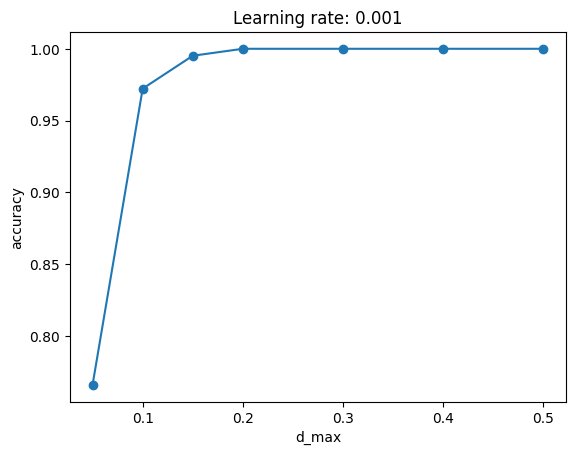

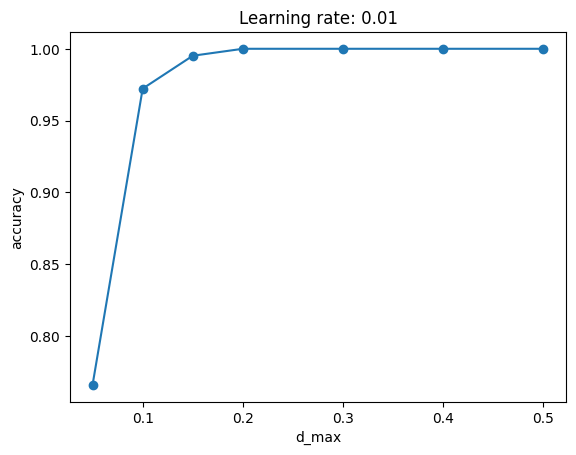

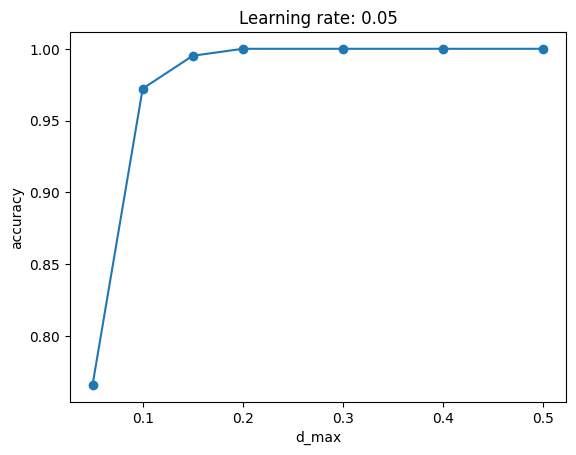

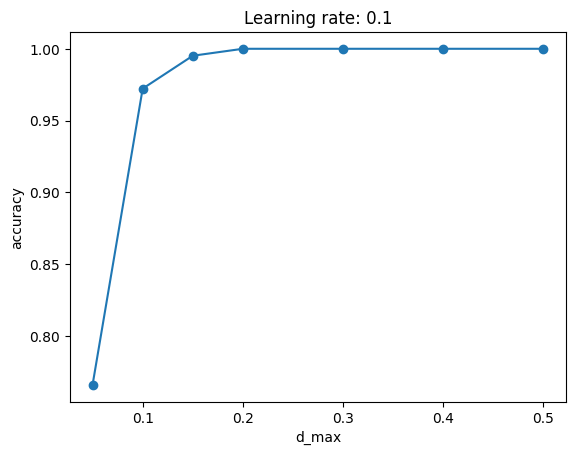

Accuracy: 1.0
Delta: 
obj: -264
endobj: -266
stream: -76
endstream: -74
xref: -7
trailer: -5
startxref: -7
pages: -4
isEncrypted: -1
ObjStm: -9
JS: 10
Javascript: 16
Colors: 50


,obj,endobj,stream,endstream,xref,trailer,startxref,pages,isEncrypted,ObjStm,...,Javascript,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,embedded files,XFA,Colors
0,279,281,77,76,8,5,8,4,0,8,...,-13,0,0,1,0,0,0,0,0,-51
1,272,274,77,76,8,5,8,4,0,8,...,-15,0,0,0,0,0,0,0,0,-51
2,274,276,77,76,8,5,8,4,0,8,...,-15,0,0,0,0,0,0,0,0,-51
3,272,274,77,76,8,5,8,4,0,8,...,-15,0,0,0,0,0,0,0,0,-51
4,273,275,78,77,8,5,8,4,0,8,...,-15,0,0,0,0,0,0,0,0,-51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266,271,273,76,75,7,5,7,4,0,8,...,-14,0,0,0,0,0,0,0,0,-51
2267,285,287,81,80,8,5,8,4,0,8,...,-13,0,0,0,0,0,0,0,0,-51
2268,264,266,74,74,7,3,7,4,0,7,...,-16,0,0,0,0,0,0,0,0,-52
2269,320,322,74,74,7,3,7,2,0,7,...,-16,0,0,0,0,0,0,-1,0,-21


In [26]:

weights_linear = svc.coef_[0]
bias_linear = svc.intercept_
gradient_linear = weights_linear
print(f"Linear weights:\n{gradient_linear}")

gamma = svc_rbf.get_params()['gamma']
weights_rbf = svc_rbf.dual_coef_[0]

support_vectors_rbf = svc_rbf.support_vectors_
# print(f"Gamma: {gamma}, Weights: {weights_rbf.shape}, Support Vectors: {support_vectors_rbf.shape}")

malicious_samples = class_data[data['Class'] == 1]
x_malicious_samples = malicious_samples.to_numpy().astype(int)
modified = np.zeros(x_malicious_samples.shape)
x_malicious_samples = scaler.transform(x_malicious_samples)

results_svm1 = {}

learning_rates = [0.001, 0.01, 0.05, 0.1]
epsilons = [0.001]
iterations = 100
d_values = [0.05, 0.1, 0.15, 0.2, 0.3] # for MinMaxScaler
# d_values = [0, 0.5, 1, 1.5, 2, 3, 4, 5, 7, 10,] # number of modifications (scaled)
accuracy = 0

kernel = "linear"
grad_i = 0

for lr in learning_rates:

    for d in d_values:

        modified = np.zeros(x_malicious_samples.shape)
        for i in range (len(x_malicious_samples)):
            if kernel == 'linear':
                grad_i = gradient_linear
            elif kernel == 'rbf':
                grad_i = svm_gradient(weights=weights_rbf,feature_vector=x_malicious_samples[i],support_vectors=support_vectors_rbf,kernel='rbf',gamma=gamma)

            modified[i] = evasion_gradient_descent(
                x0=x_malicious_samples[i],
                gradient=grad_i,
                t=lr,
                epsilon=epsilons[0],
                max_iter=iterations,
                d_max=d
                )
        cl = svc.predict(modified)   
        modified_samples = pd.DataFrame(modified, columns=class_data.columns)
        modified_samples['Class'] = cl
        accuracy = len(modified_samples[modified_samples['Class'] == 0]) / len(x_malicious_samples)
        results_svm1[d] = accuracy
        # print(f"Accuracy: {accuracy} with learning rate = {lr} and d_max = {d}")
    
    # Plot the results
    x_values = list(results_svm1.keys())
    y_values = list(results_svm1.values())

    plt.plot(x_values, y_values, marker='o', label='Data')
    plt.title(f"Learning rate: {lr}")
    plt.xlabel('d_max')
    plt.ylabel('accuracy')

    plt.show()


cl = svc.predict(modified)
modified_samples = pd.DataFrame(modified, columns=class_data.columns)
modified_samples['Class'] = cl
# print(modified_samples)

accuracy = len(modified_samples[modified_samples['Class'] == 0]) / len(x_malicious_samples)
print(f"Accuracy: {accuracy}")

print("Delta: ")
delta_df1 = x_malicious_samples - modified
delta_df1_scaled = scaler.inverse_transform(delta_df1)
delta_df1 = pd.DataFrame(delta_df1_scaled, columns=class_data.columns)
for col in delta_df1.columns:
    val = delta_df1.iloc[0][col].astype(int)
    if val != 0:
        print(f"{col}: {val}")

final_modified1 = pd.DataFrame(scaler.inverse_transform(modified), columns=class_data.columns).astype(int)

final_modified1

Linear weights:
[ -1.70433354  -1.71634597  -5.44470045  -5.33584695 -12.53431164
  -6.36131731  -5.02018913  -0.29334717  -3.33483422  -4.9291351
   6.4239791   10.33475717   0.03478261   2.4833711   -0.03371682
  -1.15384615   1.25         2.           0.61526902   5.84831271
   0.4095742 ]
Gamma: 10, Weights: (661,), Support Vectors: (661, 21)
(1729, 21) (2271, 21)


/home/paul/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/paul/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


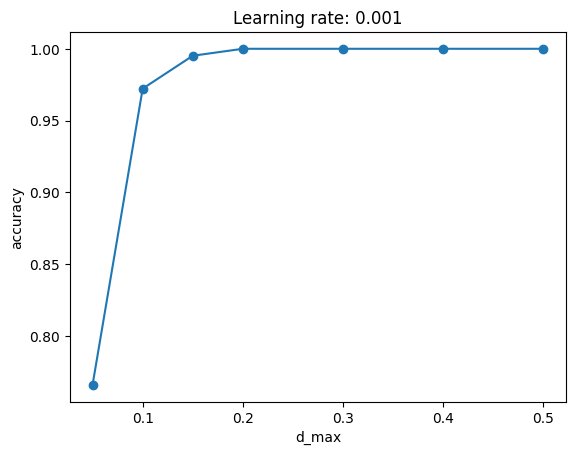

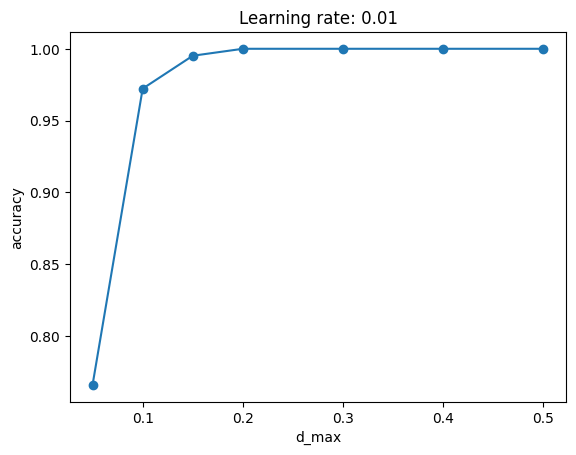

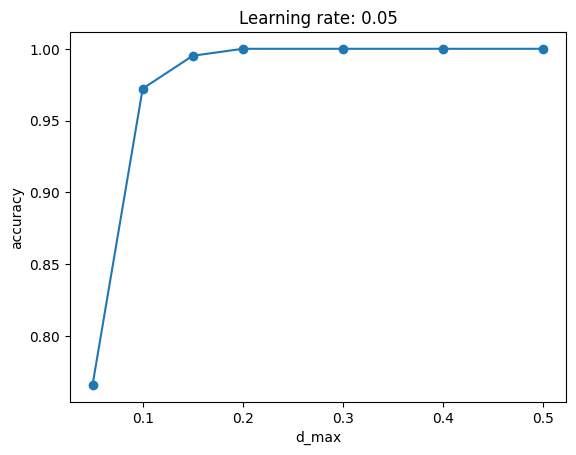

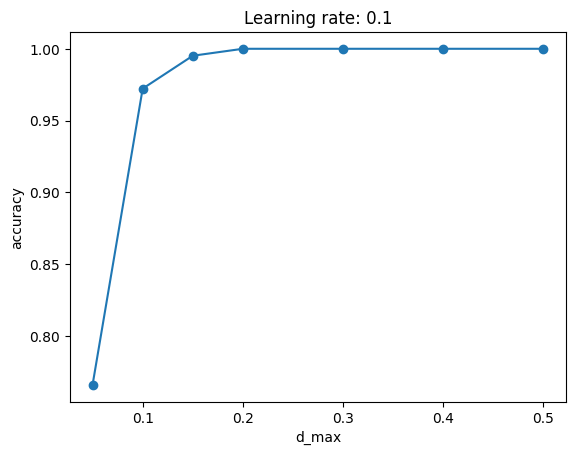

Accuracy: 1.0
Delta: 
obj: -264
endobj: -266
stream: -76
endstream: -74
xref: -7
trailer: -5
startxref: -7
pages: -4
isEncrypted: -1
ObjStm: -9
JS: 10
Javascript: 16
Colors: 50


,obj,endobj,stream,endstream,xref,trailer,startxref,pages,isEncrypted,ObjStm,...,Javascript,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,embedded files,XFA,Colors
0,279,281,77,76,8,5,8,4,0,8,...,-13,0,0,1,0,0,0,0,0,-51
1,273,274,77,76,8,5,8,4,0,8,...,-15,0,0,0,0,0,0,0,0,-51
2,275,276,77,76,8,5,8,4,0,8,...,-15,0,0,0,0,0,0,0,0,-51
3,273,274,77,76,8,5,8,4,0,8,...,-15,0,0,0,0,0,0,0,0,-51
4,274,275,78,77,8,5,8,4,0,8,...,-15,0,0,0,0,0,0,0,0,-51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266,272,273,76,75,7,5,7,4,0,8,...,-14,0,0,0,0,0,0,0,0,-51
2267,285,287,81,80,8,5,8,4,0,8,...,-13,0,0,0,0,0,0,0,0,-51
2268,265,266,74,74,7,3,7,4,0,7,...,-16,0,0,0,0,0,0,0,0,-52
2269,320,322,74,74,7,3,7,2,0,7,...,-16,0,0,0,0,0,0,-1,0,-21


In [27]:
weights_linear = svc.coef_[0]
bias_linear = svc.intercept_
gradient_linear = weights_linear
print(f"Linear weights:\n{gradient_linear}")

gamma = svc_rbf.get_params()['gamma']
weights_rbf = svc_rbf.dual_coef_[0]
# print(f"{x_train_svm.iloc[svc_rbf.support_].head()}")
support_vectors_rbf = svc_rbf.support_vectors_ # x_train_svm.iloc[svc_rbf.support_].to_numpy().astype(int)
# print(f"Gamma: {gamma}, Weights: {weights_rbf.shape}, Support Vectors: {support_vectors_rbf.shape}")

malicious_samples = class_data[data['Class'] == 1]
x_malicious_samples = malicious_samples.to_numpy().astype(int)
x_malicious_samples = scaler.transform(x_malicious_samples)

benign_samples = class_data[data['Class'] == 0]
x_benign_samples = benign_samples.to_numpy().astype(int)
x_benign_samples = scaler.transform(x_benign_samples)

print(x_benign_samples.shape, x_malicious_samples.shape)

modified = np.zeros(x_malicious_samples.shape)

results_svm2 = {}
learning_rates = [0.001, 0.01, 0.05, 0.1]
epsilons = [0.001]
iterations = 100
d_values = [0.05, 0.1, 0.15, 0.2, 0.3] # for MinMaxScaler
# d_values = [0, 0.5, 1, 1.5, 2, 3, 4, 7, 10] # number of modifications (scaled)
accuracy = 0

kernel = "linear"
grad_i = 0

for lr in learning_rates:

    for d in d_values:

        modified = np.zeros(x_malicious_samples.shape)
        for i in range (len(x_malicious_samples)):
            if kernel == 'linear':
                grad_i = gradient_linear
            elif kernel == 'rbf':
                grad_i = svm_gradient(weights=weights_rbf,feature_vector=x_malicious_samples[i],support_vectors=support_vectors_rbf,kernel='rbf',gamma=gamma)

            modified[i] = evasion_gradient_descent_penalized(
                x0=x_malicious_samples[i],
                gradient=grad_i,
                t=lr,
                epsilon=epsilons[0],
                max_iter=iterations,
                x=x_benign_samples,
                l=1000,
                d_max=d
                )

        cl = svc.predict(modified)  
        modified_samples = pd.DataFrame(modified, columns=class_data.columns)
        
        modified_samples['Class'] = cl
        accuracy = len(modified_samples[modified_samples['Class'] == 0]) / len(x_malicious_samples)
        results_svm2[d] = accuracy
        # print(f"Accuracy: {accuracy: .2f} with learning rat = {lr} and d_max = {d}")

    # Plot the results
    x_values = list(results_svm2.keys())
    y_values = list(results_svm2.values())

    plt.plot(x_values, y_values, marker='o', label='Data')
    plt.title(f"Learning rate: {lr}")
    plt.xlabel('d_max')
    plt.ylabel('accuracy')

    plt.show()


cl = svc.predict(modified)
modified_samples = pd.DataFrame(modified, columns=class_data.columns)
modified_samples['Class'] = cl
# print(modified_samples)

accuracy = len(modified_samples[modified_samples['Class'] == 0]) / len(x_malicious_samples)
print(f"Accuracy: {accuracy}")

print("Delta: ")
delta_df2 = x_malicious_samples - modified
delta_df2_scaled = scaler.inverse_transform(delta_df2)
delta_df2 = pd.DataFrame(delta_df2_scaled, columns=class_data.columns)
for col in delta_df2.columns:
    val = delta_df2.iloc[0][col].astype(int)
    if val != 0:
        print(f"{col}: {val}")

final_modified2 = pd.DataFrame(scaler.inverse_transform(modified), columns=class_data.columns).astype(int)

final_modified2

Linear weights:
[ -1.70433354  -1.71634597  -5.44470045  -5.33584695 -12.53431164
  -6.36131731  -5.02018913  -0.29334717  -3.33483422  -4.9291351
   6.4239791   10.33475717   0.03478261   2.4833711   -0.03371682
  -1.15384615   1.25         2.           0.61526902   5.84831271
   0.4095742 ]
Gamma: 10, Weights: (661,), Support Vectors: (661, 21)
(1729, 21) (2271, 21)


/home/paul/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/paul/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


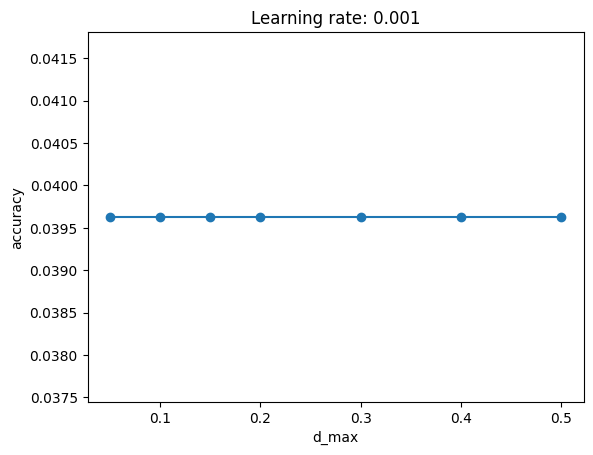

KeyboardInterrupt: 

In [28]:
weights_linear = svc.coef_[0]
bias_linear = svc.intercept_
gradient_linear = weights_linear
# print(f"Linear weights:\n{gradient_linear}")

gamma = svc_rbf.get_params()['gamma']
weights_rbf = svc_rbf.dual_coef_[0]
# print(f"{x_train_svm.iloc[svc_rbf.support_].head()}")
support_vectors_rbf = svc_rbf.support_vectors_ # x_train_svm.iloc[svc_rbf.support_].to_numpy().astype(int)
print(f"Gamma: {gamma}, Weights: {weights_rbf.shape}, Support Vectors: {support_vectors_rbf.shape}")

malicious_samples = class_data[data['Class'] == 1]
x_malicious_samples = malicious_samples.to_numpy().astype(int)
x_malicious_samples = scaler.transform(x_malicious_samples)

benign_samples = class_data[data['Class'] == 0]
x_benign_samples = benign_samples.to_numpy().astype(int)
x_benign_samples = scaler.transform(x_benign_samples)

print(x_benign_samples.shape, x_malicious_samples.shape)

modified = np.zeros(x_malicious_samples.shape)

results_svm3 = {}
learning_rates = [0.001, 0.01, 0.05, 0.1]
epsilons = [0.001]
iterations = 100
d_values = [0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5] # for MinMaxScaler
# d_values = [0, 0.5, 1, 1.5, 2, 3, 4, 5, 7, 10,] # number of modifications (scaled)

kernel = "rbf"
grad_i = 0

for lr in learning_rates:

    for d in d_values:

        modified = np.zeros(x_malicious_samples.shape)
        for i in range (len(x_malicious_samples)):
            if kernel == 'linear':
                grad_i = gradient_linear
            elif kernel == 'rbf':
                grad_i = svm_gradient(weights=weights_rbf,feature_vector=x_malicious_samples[i],support_vectors=support_vectors_rbf,kernel='rbf',gamma=gamma)

            modified[i] = evasion_gradient_descent_penalized(
                x0=x_malicious_samples[i],
                gradient=grad_i,
                t=lr,
                epsilon=epsilons[0],
                max_iter=iterations,
                x=x_benign_samples,
                l=1000,
                d_max=d
                )

        cl = svc_rbf.predict(modified)  
        modified_samples = pd.DataFrame(modified, columns=class_data.columns)
        
        modified_samples['Class'] = cl
        accuracy = len(modified_samples[modified_samples['Class'] == 0]) / len(x_malicious_samples)
        results_svm3[d] = accuracy
        # print(f"Accuracy: {accuracy: .2f} with learning rate = {lr} and d_max = {d}")

    # Plot the results
    x_values = list(results_svm3.keys())
    y_values = list(results_svm3.values())

    plt.plot(x_values, y_values, marker='o', label='Data')
    plt.title(f"Learning rate: {lr}")
    plt.xlabel('d_max')
    plt.ylabel('accuracy')

    plt.show()


cl = svc_rbf.predict(modified)
modified_samples = pd.DataFrame(modified, columns=class_data.columns)
modified_samples['Class'] = cl
# print(modified_samples)

accuracy = len(modified_samples[modified_samples['Class'] == 0]) / len(x_malicious_samples)
print(f"Accuracy: {accuracy}")

print("Delta: ")
delta_df3 = x_malicious_samples - modified
delta_df3_scaled = scaler.inverse_transform(delta_df3)
delta_df3 = pd.DataFrame(delta_df3_scaled, columns=class_data.columns)
for col in delta_df3.columns:
    val = delta_df3.iloc[0][col].astype(int)
    if val != 0:
        print(f"{col}: {val}")

final_modified3 = pd.DataFrame(scaler.inverse_transform(modified), columns=class_data.columns).astype(int)

final_modified3

In [185]:
final_modified3.describe()

,obj,endobj,stream,endstream,xref,trailer,startxref,pages,isEncrypted,ObjStm,...,Javascript,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,embedded files,XFA,Colors
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.0,284.000000,...,284.000000,284.000000,284.0,284.000000,284.0,284.0,284.0,284.0,284.0,284.000000
mean,68.595070,68.573944,26.904930,26.957746,1.010563,0.978873,1.077465,3.823944,0.0,2.038732,...,0.045775,0.014085,0.0,0.007042,0.0,0.0,0.0,0.0,0.0,0.299296
std,6.923212,6.928572,2.592755,2.552275,0.585358,0.611646,0.404462,12.702522,0.0,0.269628,...,0.558914,0.237356,0.0,0.118678,0.0,0.0,0.0,0.0,0.0,3.182083
min,35.000000,35.000000,14.000000,14.000000,0.000000,0.000000,0.000000,2.000000,0.0,1.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
25%,66.000000,66.000000,25.000000,26.000000,1.000000,1.000000,1.000000,3.000000,0.0,2.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
50%,70.000000,70.000000,28.000000,28.000000,1.000000,1.000000,1.000000,3.000000,0.0,2.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
75%,71.000000,71.000000,28.000000,28.000000,1.000000,1.000000,1.000000,3.000000,0.0,2.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
max,130.000000,130.000000,36.000000,36.000000,10.000000,10.000000,6.000000,217.000000,0.0,5.000000,...,9.000000,4.000000,0.0,2.000000,0.0,0.0,0.0,0.0,0.0,45.000000


## MLP

In [186]:
x_train_mlp, x_test_mlp, y_train_mlp, y_test_mlp = train_test_split(class_data, data['Class'], test_size=0.2, random_state=77)

In [187]:
# Normalize features
normalizer = MinMaxScaler()
x_train_mlp = normalizer.fit_transform(x_train_mlp)
x_test_mlp = normalizer.transform(x_test_mlp)

pd.DataFrame(x_train_mlp, columns=class_data.columns).head()

,obj,endobj,stream,endstream,xref,trailer,startxref,pages,isEncrypted,ObjStm,...,Javascript,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,embedded files,XFA,Colors
0,0.054434,0.054434,0.256684,0.252688,0.1250,0.176471,0.2,0.005034,0.5,0.02381,...,0.000,0.0,0.0,0.2,1.0,0.0,0.0,0.5,0.0,0.008850
1,0.005268,0.005268,0.016043,0.010753,0.0625,0.117647,0.1,0.003356,0.5,0.02381,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.008850
2,0.014925,0.014925,0.032086,0.026882,0.0625,0.117647,0.1,0.003356,0.5,0.02381,...,0.125,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.008850
3,0.009658,0.009658,0.021390,0.016129,0.0000,0.117647,0.0,0.003356,0.5,0.02381,...,0.250,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.008850
4,0.028973,0.028973,0.053476,0.048387,0.0625,0.117647,0.1,0.000000,0.0,0.02381,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.026549


In [188]:
hidden_layers = (64,)
activation = 'tanh'
solver = 'adam'

mlp = MLPClassifier(hidden_layer_sizes=hidden_layers, activation=activation, solver=solver)
mlp.fit(x_train_mlp, y_train_mlp)

y_pred = mlp.predict(x_test_mlp)

mlp_accuracy = accuracy_score(y_test_mlp, y_pred)
mlp_precision = precision_score(y_test_mlp, y_pred)
mlp_recall = recall_score(y_test_mlp, y_pred)
mlp_f1 = f1_score(y_test_mlp, y_pred)

print(f"""MLP scores
      accuracy score: {mlp_accuracy}
      precision score: {mlp_precision}
      recall score: {mlp_recall}
      f1 score: {mlp_recall}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test_mlp, y_pred)}")



MLP scores
      accuracy score: 0.97
      precision score: 0.9827586206896551
      recall score: 0.9661016949152542
      f1 score: 0.9661016949152542

Confusion matrix:
[[40  1]
 [ 2 57]]


/home/paul/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [189]:
def tanh(z):
    return np.tanh(z)

def sigmoid(z): 
    return 1 / (1 + np.exp(-z))

def relu(z):
    return max(0, z)

def tanh_derivative(z):
    return 1 - np.pow(tanh(z), 2)

def sigmoid_derivative(z):
    return 1 - sigmoid(z)

def relu_derivative(z):
    return z>=0


def mlp_discriminant(x, hidden_weights, hidden_bias, output_weights, output_bias):
    g = tanh(output_weights.T @ tanh(hidden_weights.T @ x + hidden_bias) + output_bias)
    return g


def mlp_gradient(x, hidden_weights, hidden_bias, output_weights, output_bias):
    g = mlp_discriminant(x, hidden_weights, hidden_bias, output_weights, output_bias)
    delta_k = tanh(hidden_weights.T @ x + hidden_bias)

    delta_g = np.zeros(x.shape)
    for i in range(x.shape[0]):
        # delta_g_i = g * (1 - np.pow(g, 1)) * (output_weights.T @ (delta_k * (1 - np.pow(delta_k, 1)) * hidden_weights[i]))
        delta_g_i = g * (1 - np.pow(g, 2)) * (output_weights.T @ (delta_k * (1 - np.pow(delta_k, 2)) * hidden_weights[i]))
        delta_g[i] = delta_g_i.item()

    return delta_g

weights = mlp.coefs_

bias = mlp.intercepts_
output_weights = np.array(weights[-1])
output_bias = np.array(bias[-1])
hidden_weights = np.array(weights[0])
hidden_bias = np.array(bias[0])

/home/paul/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


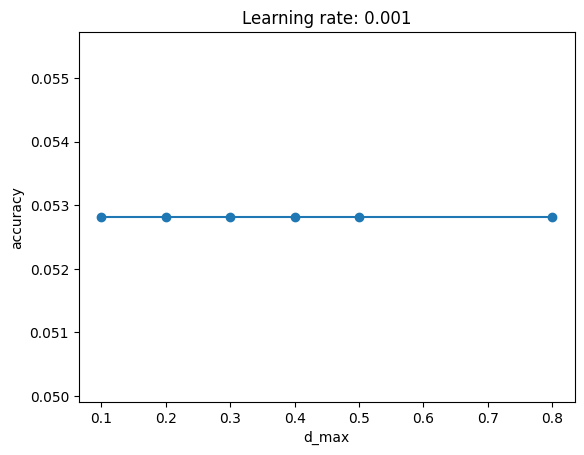

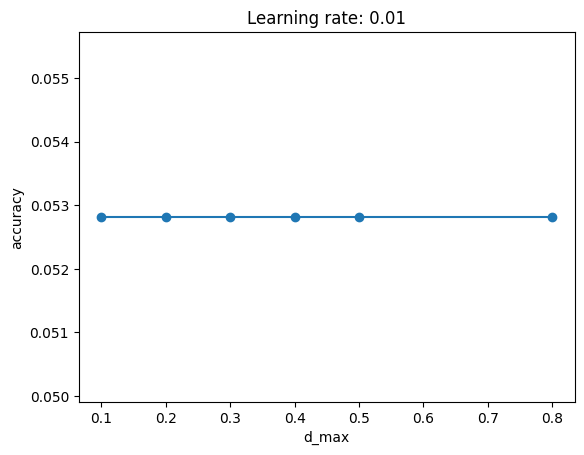

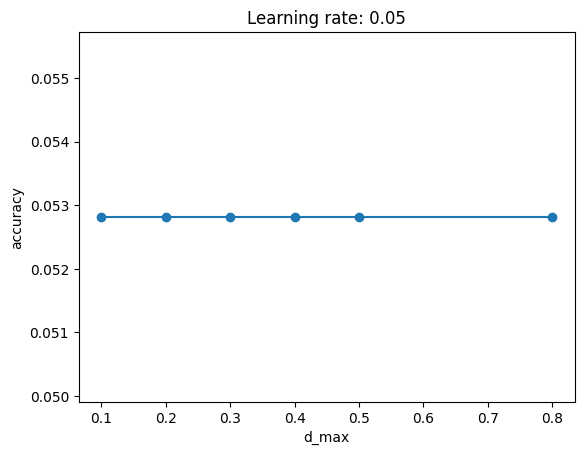

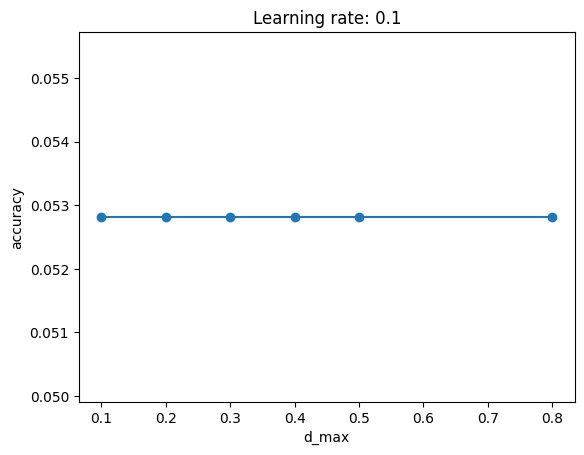

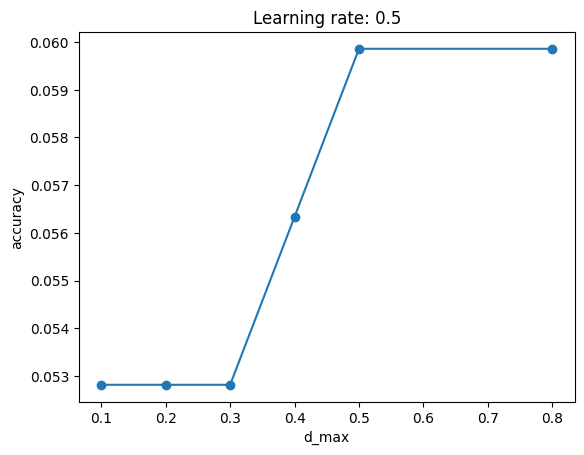

Accuracy:  0.06
Delta: 


,obj,endobj,stream,endstream,xref,trailer,startxref,pages,isEncrypted,ObjStm,...,Javascript,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,embedded files,XFA,Colors
0,1.220803e-01,-5.707729e-02,-1.253649e-01,2.199998e-01,2.436170e-01,2.798796e-01,8.259736e-02,-3.968833e-02,1.230727e-01,1.590167e-01,...,-3.590928e-01,-1.001320e-01,-2.991093e-01,-1.034637e-01,1.861246e-01,-3.772142e-02,-1.477365e-01,-3.104901e-02,-1.556498e-01,-2.210956e-01
1,3.142674e-04,-2.860239e-05,-1.232370e-04,-1.891339e-05,2.555695e-04,3.915690e-04,2.660884e-04,-2.041917e-04,-4.964603e-05,1.717429e-04,...,-4.160923e-04,-1.608120e-04,-2.762059e-04,9.207839e-05,2.833775e-04,1.241768e-04,-1.574411e-04,-4.212504e-05,-1.168013e-04,-2.794768e-04
2,-1.804274e-01,7.516916e-02,-1.815003e-02,-1.348618e-02,-2.764192e-01,-1.245602e-01,-2.364388e-01,5.662256e-02,-8.975291e-02,-3.732221e-02,...,-1.727733e-02,-4.755268e-02,-8.974003e-02,-9.713587e-02,-1.084869e-01,1.102897e-02,1.890894e-01,4.616022e-02,-5.435300e-02,1.414484e-01
3,3.171053e-04,-2.905369e-05,-1.273629e-04,-2.273132e-05,2.557754e-04,3.913050e-04,2.713853e-04,-2.087069e-04,-4.777509e-05,1.746501e-04,...,-4.165654e-04,-1.607304e-04,-2.750438e-04,9.433905e-05,2.848596e-04,1.289530e-04,-1.569658e-04,-4.356107e-05,-1.128800e-04,-2.780796e-04
4,2.743070e-04,-2.786189e-05,-1.142821e-04,-2.328192e-05,2.191829e-04,3.443642e-04,2.352507e-04,-1.827761e-04,-4.605214e-05,1.518798e-04,...,-3.651194e-04,-1.429787e-04,-2.417711e-04,8.443623e-05,2.504099e-04,1.142330e-04,-1.369317e-04,-3.868836e-05,-9.798382e-05,-2.441735e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1.577961e-07,-2.238706e-07,-9.961033e-07,-1.519545e-06,4.236572e-07,-1.959429e-07,-8.410313e-10,-5.327473e-07,-1.111589e-06,-3.403965e-07,...,3.756589e-07,1.757385e-07,3.025223e-07,9.464767e-08,3.113135e-07,1.402453e-06,1.182455e-06,6.423979e-07,1.370287e-06,1.028003e-06
280,3.160331e-02,-2.830584e-03,-1.225629e-02,-1.592993e-03,2.564468e-02,3.944398e-02,2.661118e-02,-2.022509e-02,-4.827896e-03,1.741311e-02,...,-4.213546e-02,-1.632214e-02,-2.802552e-02,9.410538e-03,2.874869e-02,1.231669e-02,-1.598286e-02,-4.436005e-03,-1.218837e-02,-2.803462e-02
281,1.748787e-01,-1.031564e-01,-1.418197e-01,1.429921e-01,2.412474e-01,3.303156e-01,1.698452e-01,-8.905162e-02,1.729254e-02,1.425013e-01,...,-3.360926e-01,-1.217037e-01,-2.991049e-01,-1.088246e-01,1.914355e-01,4.256700e-02,-1.550908e-01,7.905261e-03,-1.063936e-01,-1.747011e-01
282,3.142674e-04,-2.860239e-05,-1.232370e-04,-1.891339e-05,2.555695e-04,3.915690e-04,2.660884e-04,-2.041917e-04,-4.964603e-05,1.717429e-04,...,-4.160923e-04,-1.608120e-04,-2.762059e-04,9.207839e-05,2.833775e-04,1.241768e-04,-1.574411e-04,-4.212504e-05,-1.168013e-04,-2.794768e-04


In [190]:
malicious_samples = class_data[data['Class'] == 1]
x_malicious_samples = malicious_samples.to_numpy().astype(int)
modified = np.zeros(x_malicious_samples.shape)

norms = np.linalg.norm(x_malicious_samples, axis=1, keepdims=True)
mean_norms = np.mean(norms)
x_malicious_samples = normalizer.transform(x_malicious_samples)

results_mlp1 = {}
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.5]
epsilons = [0.001]
iterations = 100
d_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.8] # for MinMaxScaler
accuracy = 0


for lr in learning_rates:

    for d in d_values:

        modified = np.zeros(x_malicious_samples.shape)
        for i in range (len(x_malicious_samples)):
            mlp_gr = mlp_gradient(x_malicious_samples[i], hidden_weights, hidden_bias, output_weights, output_bias)

            modified[i] = evasion_gradient_descent(
                x0=x_malicious_samples[i],
                gradient=mlp_gr,
                t=lr,
                epsilon=epsilons[0],
                max_iter=iterations,
                d_max=d
                )

        cl = mlp.predict(modified)  
        modified_samples = pd.DataFrame(modified, columns=class_data.columns)
        
        modified_samples['Class'] = cl
        accuracy = len(modified_samples[modified_samples['Class'] == 0]) / len(x_malicious_samples)
        results_mlp1[d] = accuracy
        # print(f"Accuracy: {accuracy: .2f} with learning rate = {lr} and d_max = {d}")
    
    # Plot the results
    x_values = list(results_mlp1.keys())
    y_values = list(results_mlp1.values())

    plt.plot(x_values, y_values, marker='o', label='Data')
    plt.title(f"Learning rate: {lr}")
    plt.xlabel('d_max')
    plt.ylabel('accuracy')

    plt.show()

cl = mlp.predict(modified)
modified_samples = pd.DataFrame(modified, columns=class_data.columns)
modified_samples['Class'] = cl
modified_samples.describe()

accuracy = len(modified_samples[modified_samples['Class'] == 0]) / len(x_malicious_samples)
print(f"Accuracy: {accuracy: .2f}")

print("Delta: ")
delta_df = x_malicious_samples - modified

delta_df = pd.DataFrame(delta_df, columns=class_data.columns)
delta_df#.iloc[0]

(216, 21) (284, 21)


/home/paul/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/paul/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


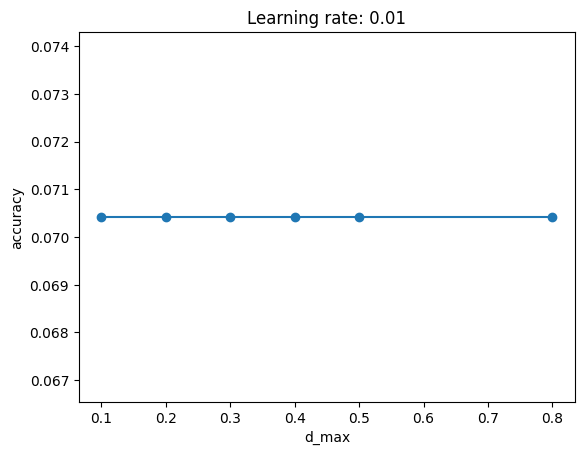

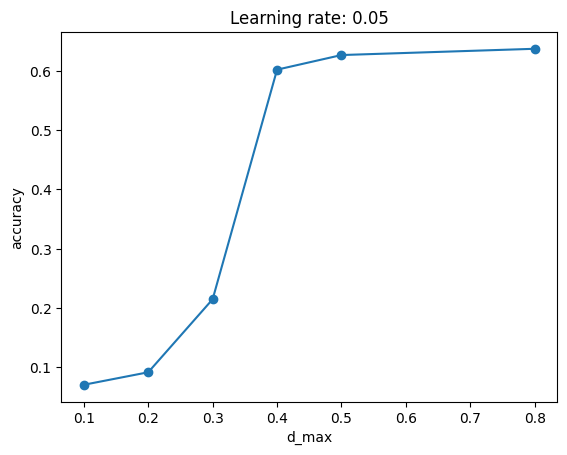

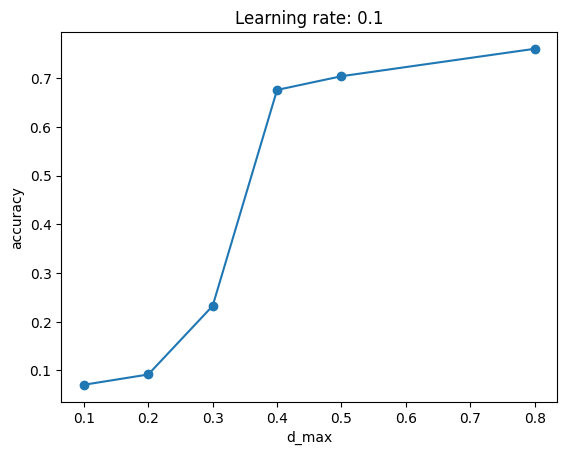

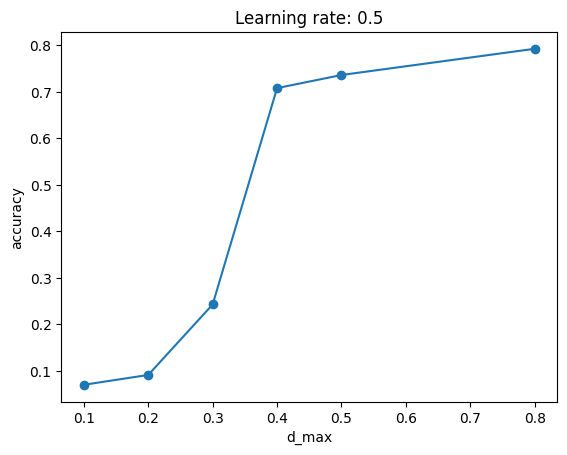

Accuracy: 0.7922535211267606
Delta: 
obj: 31
endobj: -133
stream: -53
xref: 1
startxref: -1
pages: -23
Javascript: -4
AA: -2
Acroform: -1
embedded files: -1
Colors: -22


,obj,endobj,stream,endstream,xref,trailer,startxref,pages,isEncrypted,ObjStm,...,Javascript,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,embedded files,XFA,Colors
0,-31,133,51,0,-1,-2,1,23,0,-1,...,4,2,0,1,0,0,0,0,0,20
1,74,78,31,31,1,1,1,5,0,3,...,0,0,0,0,0,0,0,0,0,0
2,148,123,30,30,1,1,2,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,74,78,31,31,1,1,1,5,0,3,...,0,0,0,0,0,0,0,0,0,0
4,74,78,31,31,1,1,1,5,0,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,35,35,14,14,1,0,0,2,0,2,...,0,0,0,0,0,0,0,0,0,0
280,74,78,31,31,1,1,1,5,0,3,...,0,0,0,0,0,0,0,0,0,0
281,31,110,39,26,0,0,1,17,0,1,...,1,0,0,0,0,0,0,0,0,5
282,74,78,31,31,1,1,1,5,0,3,...,0,0,0,0,0,0,0,0,0,0


In [191]:

malicious_samples = class_data[data['Class'] == 1]
x_malicious_samples = malicious_samples.to_numpy().astype(int)
x_malicious_samples = normalizer.transform(x_malicious_samples)
norms = np.linalg.norm(x_malicious_samples, axis=1, keepdims=True)
mean_norms = np.mean(norms)

benign_samples = class_data[data['Class'] == 0]
x_benign_samples = benign_samples.to_numpy().astype(int)
x_benign_samples = normalizer.transform(x_benign_samples)

print(x_benign_samples.shape, x_malicious_samples.shape)

modified = np.zeros(x_malicious_samples.shape)

results_mlp2 = {}
learning_rates = [0.01, 0.05, 0.1, 0.5]
epsilons = [0.001]
iterations = 100
d_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.8] # for MinMaxScaler
accuracy = 0


for lr in learning_rates:

    for d in d_values:

        modified = np.zeros(x_malicious_samples.shape)
        for i in range (len(x_malicious_samples)):
            mlp_gr = mlp_gradient(x_malicious_samples[i], hidden_weights, hidden_bias, output_weights, output_bias)

            modified[i] = evasion_gradient_descent_penalized(
                x0=x_malicious_samples[i],
                gradient=mlp_gr,
                t=lr,
                epsilon=epsilons[0],
                max_iter=iterations,
                x=x_benign_samples,
                l=1000,
                d_max=d
                )

        cl = mlp.predict(modified)  
        modified_samples = pd.DataFrame(modified, columns=class_data.columns)
        
        modified_samples['Class'] = cl
        accuracy = len(modified_samples[modified_samples['Class'] == 0]) / len(x_malicious_samples)
        results_mlp2[d] = accuracy
        # print(f"Accuracy: {accuracy: .2f} with learning rate = {lr} and d_max = {d}")
    
    # Plot the results
    x_values = list(results_mlp2.keys())
    y_values = list(results_mlp2.values())

    plt.plot(x_values, y_values, marker='o', label='Data')
    plt.title(f"Learning rate: {lr}")
    plt.xlabel('d_max')
    plt.ylabel('accuracy')

    plt.show()


cl = mlp.predict(modified)
modified_samples = pd.DataFrame(modified, columns=class_data.columns)
modified_samples['Class'] = cl
# print(modified_samples)

accuracy = len(modified_samples[modified_samples['Class'] == 0]) / len(x_malicious_samples)
print(f"Accuracy: {accuracy}")

print("Delta: ")
delta_df4 = x_malicious_samples - modified
delta_df4_scaled = scaler.inverse_transform(delta_df4)
delta_df4 = pd.DataFrame(delta_df4_scaled, columns=class_data.columns)
for col in delta_df4.columns:
    val = delta_df4.iloc[0][col].astype(int)
    if val != 0:
        print(f"{col}: {val}")

final_modified4 = pd.DataFrame(scaler.inverse_transform(modified), columns=class_data.columns).astype(int)

final_modified4